In [3]:
from IPython.display import display, HTML # type:ignore
style = '<style> body { font-family: Oswald; font-size: 16px; } </style>'
display(HTML(style))

# <div style="font-family:'fantasy';">Decision Trees</div>
This can perform both classification and regression or even multioutput task

# <div style="font-family:'fantasy';">Training and vizualizing a Decision Trees</div>


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
X = iris.data[:,2:] # type: ignore
y = iris.target # type: ignore
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

here we generate the tree

In [3]:
from sklearn.tree import export_graphviz
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
export_graphviz(
    tree_clf,
    out_file=str(IMAGES_PATH/'iris_tree.dot'),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
# converting to png
# $ dot -Tpng iris_tree.dot -o iris_tree.png


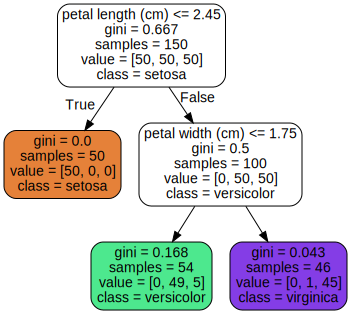

In [4]:
# displaying image 
from graphviz import Source
Source.from_file(IMAGES_PATH/'iris_tree.dot')

### <div style="font-family:'fantasy';">Making Predictions</div>

The above tree depicts the scheme for segregation during classiffication. Suppose we find an iris flower and want to classify it. We start with the <u>root node</u>: This node asks whether the flower's petal length is smaller than 2.45cm if yes then it goes to the left(in this case it is leaf node as it is pure ), so it does not ask any further questions and predicts that it is <b>iris-setosa</b>. suppose we find another flower with petal length greater than 2.45cm then we must go the right and then check again if the petal if petal width is smaller than 1.75 cm if yes then it is <b>iris-versicolor</b> else <b>iris-virginica</b>. here the node's ```sample``` attribute counts how many training instances it applies to. ```value``` attribute gives the count attributed to different classes within the sample. ```gini``` gives the purity test. based on the values
gini can be calculated as 
```
gini = 0
sum=0
for i in values:
    sum+=(i/samples)**2
gini = 1-sum
```
Thus for purest node gini is 0 and for most impure gini is 1. Hence we can also say we are intended in minimizing gini.
$$
Gini \ impurity =
G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2
$$
Note that decision trees do not require feature scaling.\
the below figure depicts the decision boundaries.

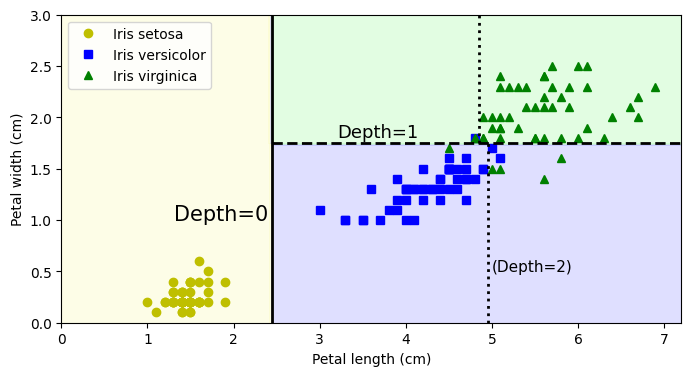

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0']) # type: ignore
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))): # type: ignore
    plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X, y)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]] # type: ignore
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

Note the in every depth the impure nodes are broken down to reduce the impurinty or gini factor. This is clearly depicted in the above figure

# <div style="font-family:'fantasy';">Estimating Class pobabilities</div>
Decision tree can generate probabilities. They are similar to the ratio used in gini impurity. For example for the output versicolor. for input 5cm long petal and 1.5 cm wide.
probability is,\
$\frac{0}{54} \times 100=0 (\text{iris-setosa})$\
$\frac{49}{54} \times 100=90.7 (\text{iris-versicolor})$\
$\frac{49}{54} \times 100=9.3 (\text{iris-virginica})$\

In [6]:
tree_clf.predict_proba([[5,1.5]])*100

array([[ 0.        , 90.74074074,  9.25925926]])

# <div style="font-family:'fantasy';">The CARAT Training Algorithm</div>
```sklearn``` uses classification and regression tree algo to train trees.\
<u>Algorithm:</u>
* split the training set into 2 subsets using a single feature $k$ and threshold $t_k$ eg $petal \ length$```<=```2.45cm
* Choosing $k$ and $t_k$:-\
It searches for pair ($k$,$t_k$) that produces the purest subsets(weighted by their size).
* cost function for minimization,
$$J(k,t_k) = \frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right} where \ G \ \text{measure the impurity} and m \ \text{number of instances}$$
* Then it recursively splits the subset till the ```max_depth```. It also stops when it cannot find a path that that will reduce impurity(or minimize J)
* some other hyper parameters used are \
```min_sample_split,min_sample_leaf,min_weight_fraction_leaf,max_leaf_nodes```
* TC = O($e^m$)
* works on the small datasets

# <div style="font-family:'fantasy';">computational complexity</div>
if m is the number of instances anf n is the number of features then as decision tree traverses through all instances and compares every feature O(n x mlog(m)).\
for small train set we can speed up by setting set ```presort=True``` but this slows down training for large sets.\
But while making predictions we just have to travel the leaf in BST thus giving $log_2(m)$ in the worst case.

# <div style="font-family:'fantasy';">Ginni vs Entropy impurity formats</div>
* by default gini is used but can be replaced by setting ```criterion='entropy'```
* entropy is measure of disorderness. Thus entropy is 0 for a set if all the instances belong to the same class. Thus for ith node in the tree
$$
\text{equation of entropy}\\
H_i = -\sum_{k=1}^{n}p_{i,k}log_2(p_{i,k})\\
p_{i,k}\not =0
$$
* gini is faster by a little ratio
* gini tend to isolate classes in their own branch of the tree while the entropy produces a slightly more balanced tree.

# <div style="font-family:'fantasy';"> Regularization Hyperparameter</div>
An unparametrized tree model is prone to overfit as it will closely fir to the current training set and will provide wrong results with test set. So we nee to provide parameters to reduce deg of freedom.
* ```max_dept```: reduce this for regularization
* ```min_sample_split```: minimum number of samples a node must have before splitting.
* ```min_weight_fraction_leaf```:expressed as fraction of total no of weighted instances
* ```max_leaf_nodes```
* ```max_features```:maximum number of features to evaluated while splitting the node
increasing min_* and reducing max_* helps regularize the model.
Some algorithms like branch and bound work by first training the decision tree without restrictions then pruning unnecessary nodes.\
Node whose children are all leaf s considered unnecessary if purity improvement it provides is not statistically significant.\
Statistical test used are $\chi^2$ over $\alpha$=0.05 i.e. if improvement is pure by result of chance(null hypothesis) the probability p is higher than given threshold 5%. Then node is unnecessary anf children are pruned.

# <div style="font-family:'fantasy';"> Regression</div>


In [7]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(200, 1) - 0.5  # a single random input feature
y = X ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

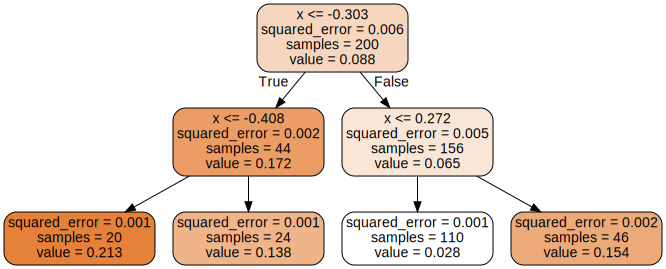

In [15]:
export_graphviz(
    tree_reg, # type: ignore
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x"],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

here instead of predicting a class in each node it predicts the value. Suppose you want to predict for a new instance with $x=0.6$. We traverse the tree starting at the root and end at leaf with value $0.154$. This prediction is average target value for 46 training instances associated with this leaf. Prediction results in $MSE=0.001$ over these 46 instances.\
<u><b>Note:</b></u> Predicted value for each region is always average target value of the instances on that region.\
Algo splits each region such that it makes most training instances as close as possible to the preddicted value(the average value) or reducing the MSE.\
Here too the CARAT algo works well just the difference is, here it minimizes the MSE.
$\text{thus the cost function being}\\
J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right} \\
\text{where} \\
MSE_{node} = \sum_{i \epsilon node}(\hat{y}_{node} - y^{(i)})^2\\
\hat{y}_{node} = \frac{1}{m_{node}}\sum_{i\epsilon node}y^{(i)}
$